# Project 2
## Image Classification with CNN
-------------------------------


             Monica Tatiana Gutierrez cod: 201810348

             Mario Felipe Garcia C cod: 201810339
             
             Erika Marcela Angel G cod: 201628012

## 1. Direct prediction
   * Download the dataset birds from http://www-cvr.ai.uiuc.edu/ponce_grp/data/.
   * Use [Keras](https://keras.io/) and a CNN from Keras [Applications](https://keras.io/applications/) pretrained on ImageNet, to classify the images in the birds dataset. Construct a confusion matrix that relates the bird classes with the 10 most frequent classes from ImageNet predicted by the model.
   * Discuss the results.
   
## 2. Transfer learning
   * Use the pre-trained CNN model as a feature extractor. Create a new model that replaces the top part of the pretrained CNN with two layers of 256 and 6 neurons respectively.
   * Train the model with the training images from the bird dataset. 
   * Evaluate the performance over the test dataset reporting the results in a confusion matrix. Discuss the results. 
   
## 3. Fine tuning
   * Repeat the experiment from the last question, but this time allow all the layers to be trained. 
   * Compare and discuss the results.

1. Direct prediction

Download the dataset birds from http://www-cvr.ai.uiuc.edu/ponce_grp/data/.
Use Keras and a CNN from Keras Applications pretrained on ImageNet, to classify the images in the birds dataset. Construct a confusion matrix that relates the bird classes with the 10 most frequent classes from ImageNet predicted by the model.
Discuss the results.

In [1]:
#path = 'C:/Users/admicf/Documents/AppliedDeepLearningClass-master/exercises/Proyecto2/'
#import tqdm
path = 'C:/Users/ERIKA ANGEL/Desktop/Proyecto2/'

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from skimage import io
import pandas as pd
import os
import numpy as np
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import r2_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from skimage import io
from tqdm import tqdm
import os
%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Se carga un data frame con la información para las bases de train/ test. El data frame cuenta con el id de la foto y la categoría a la que pertenece.

In [3]:
dataTraining = pd.read_csv(os.path.join(path,  'birds_id_training.csv'), encoding='UTF-8',sep=";",dtype=object)
dataTesting = pd.read_csv(os.path.join(path,  'birds_id_test.csv'), encoding='UTF-8', sep=";",dtype=object)
dataTraining.head()

,mandarin,puffin,owl,egret,toucan,wood_duck
0,024,100,006,018,091,047
1,092,080,070,075,011,019
2,031,015,069,029,046,090
3,008,022,015,057,077,061
4,042,023,061,071,035,082


A continuación un ejemplo de las imagenes de una de las 6 categorias, la cual corresponde a egret.

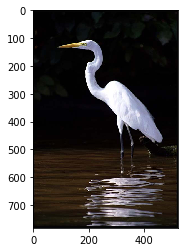

In [3]:
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

img = load_img('birds/egret/egr019.jpg')  # this is a PIL image
x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
plt.imshow(img)

In [4]:
import PIL
from PIL import Image
import glob
import piexif

def images_train(path,categories, px):  
    img = Image.open(path)
    img = img.resize(px)
    image = np.array(img)
    X_train.append(image)
    y_train.append(np.array([categories]))
    
def images_test(path,categories, px):  
    img = Image.open(path)
    img = img.resize(px)
    image = np.array(img)
    X_test.append(image)
    y_test.append(np.array([categories])) 

En el proceso de cruzar la información del data frame con las imágenes para cargarlas, se ajusta el tamaño de estas dado que no había estandarización al respecto lo cual iba a ser un problema al ajustar el modelo. por otro lado,  Con el data frame inicial se cruza para obtener el Split de train/test.

In [6]:
X_train = []
y_train = []
for i in dataTraining.egret:
    images_train(os.path.join(path, 'birds/egret/', 'egr'+ str(i) + '.jpg'),0,(100,100))
for i in dataTraining.mandarin:
    images_train(os.path.join(path, 'birds/mandarin/', 'man'+ str(i) + '.jpg'),1,(100,100))
for i in dataTraining.owl:
    images_train(os.path.join(path, 'birds/owl/', 'owl'+ str(i) + '.jpg'),2,(100,100))
for i in dataTraining.puffin:
    images_train(os.path.join(path, 'birds/puffin/', 'puf'+ str(i) + '.jpg'),3,(100,100))
for i in dataTraining.toucan:
    images_train(os.path.join(path, 'birds/Toucan/', 'tou'+ str(i) + '.jpg'),4,(100,100))
for i in dataTraining.wood_duck:
    images_train(os.path.join(path, 'birds/wood_duck/', 'wod'+ str(i) + '.jpg'),5,(100,100))

C:\ProgramData\Anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 80000 bytes but only got 0. Skipping tag 64640
  " Skipping tag %s" % (size, len(data), tag))
C:\ProgramData\Anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 2652897280 bytes but only got 0. Skipping tag 2
  " Skipping tag %s" % (size, len(data), tag))
C:\ProgramData\Anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 2656043008 bytes but only got 0. Skipping tag 2
  " Skipping tag %s" % (size, len(data), tag))
C:\ProgramData\Anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 65536 bytes but only got 0. Skipping tag 3
  " Skipping tag %s" % (size, len(data), tag))
C:\ProgramData\Anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:725: UserWarning: Possibly corrupt E

In [7]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_train.shape, y_train.shape

((420, 100, 100, 3), (420, 1))

In [8]:
X_test = []
y_test = []
for i in dataTesting.egret:
    images_test(os.path.join(path, 'birds/egret/', 'egr'+ str(i) + '.jpg'),0,(100,100))
for i in dataTesting.mandarin:
    images_test(os.path.join(path, 'birds/mandarin/', 'man'+ str(i) + '.jpg'),1,(100,100))
for i in dataTesting.owl:
    images_test(os.path.join(path, 'birds/owl/', 'owl'+ str(i) + '.jpg'),2,(100,100))
for i in dataTesting.puffin:
    images_test(os.path.join(path, 'birds/puffin/', 'puf'+ str(i) + '.jpg'),3,(100,100))
for i in dataTesting.toucan:
    images_test(os.path.join(path, 'birds/toucan/', 'tou'+ str(i) + '.jpg'),4,(100,100))
for i in dataTesting.wood_duck:
    images_test(os.path.join(path, 'birds/wood_duck/', 'wod'+ str(i) + '.jpg'),5,(100,100))

In [9]:
X_test = np.array(X_test)
y_test = np.array(y_test)
X_test.shape, y_test.shape

((180, 100, 100, 3), (180, 1))

In [10]:
import keras
nb_classes = 6
y_train = keras.utils.to_categorical(y_train,nb_classes)
y_train.shape

(420, 6)

In [11]:
import keras
nb_classes = 6
y_test = keras.utils.to_categorical(y_test,nb_classes)
y_test.shape

(180, 6)

In [12]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

Se utiliza el modelo pre-entrenado vgg16 con los pesos de image net para la clasificación de las imágenes.

In [13]:
from keras.applications.vgg16 import VGG16
model_vgg16 = VGG16(weights='imagenet', include_top=False)

In [14]:
X_train_2 = model_vgg16.predict(X_train)
#X_train_2.shape

In [15]:
X_train_2.shape

(420, 3, 3, 512)

Se ajusta una red neuronal con las especificaciones dadas y Se varía el optimizer para validar con cuál se obtiene un mejor accuracy

### Optimizer RMSprop

In [16]:
model = Sequential()

model.add(Flatten(input_shape=(3,3,512)))
model.add(Dense(units=512))
model.add(Activation('relu'))
model.add(Dropout(0.5, noise_shape=None, seed=None))
model.add(Dense(units=6))
model.add(Activation('softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               2359808   
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 3078      
_________________________________________________________________
activation_2 (Activation)    (None, 6)                 0         
Total params: 2,362,886
Trainable params: 2,362,886
Non-trainable params: 0
_________________________________________________________________


In [17]:
from keras.optimizers import RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0),
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               2359808   
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 3078      
_________________________________________________________________
activation_2 (Activation)    (None, 6)                 0         
Total params: 2,362,886
Trainable params: 2,362,886
Non-trainable params: 0
_________________________________________________________________


In [18]:
batch_size = 32
epochs = 10
history = model.fit(X_train_2, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)

Train on 378 samples, validate on 42 samples
Epoch 1/10
378/378 [==============================] - ETA: 2s - loss: 12.0891 - acc: 0.25 - ETA: 0s - loss: 11.6325 - acc: 0.27 - ETA: 0s - loss: 11.9192 - acc: 0.25 - ETA: 0s - loss: 12.0181 - acc: 0.24 - ETA: 0s - loss: 11.9788 - acc: 0.25 - ETA: 0s - loss: 11.8325 - acc: 0.25 - 1s 2ms/step - loss: 11.7459 - acc: 0.2593 - val_loss: 2.8835 - val_acc: 0.8095
Epoch 2/10
378/378 [==============================] - ETA: 0s - loss: 9.0689 - acc: 0.437 - ETA: 0s - loss: 10.0217 - acc: 0.37 - ETA: 0s - loss: 9.6656 - acc: 0.3828 - ETA: 0s - loss: 9.3917 - acc: 0.400 - ETA: 0s - loss: 9.1738 - acc: 0.415 - ETA: 0s - loss: 8.9709 - acc: 0.429 - ETA: 0s - loss: 9.0458 - acc: 0.425 - 1s 1ms/step - loss: 8.9319 - acc: 0.4339 - val_loss: 15.3607 - val_acc: 0.0476
Epoch 3/10
378/378 [==============================] - ETA: 0s - loss: 8.5627 - acc: 0.468 - ETA: 0s - loss: 8.0590 - acc: 0.500 - ETA: 0s - loss: 7.5554 - acc: 0.531 - ETA: 0s - loss: 7.5097 - a

In [19]:
y_pred = model_vgg16.predict(X_test)
score = model.evaluate(y_pred, y_test)

180/180 [==============================] - ETA:  - 0s 220us/step


In [20]:
print('Test accuracy:', score[1])
print('Test score:', score[0])

Test accuracy: 0.6944444437821706
Test score: 4.873859723409017


### Optimizer RDG

In [24]:
from keras.optimizers import SGD
model = Sequential()

model.add(Flatten(input_shape=(3,3,512)))
model.add(Dense(units=512))
model.add(Activation('relu'))
model.add(Dropout(0.5, noise_shape=None, seed=None))
model.add(Dense(units=6))
model.add(Activation('softmax'))
model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=SGD(),
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               2359808   
_________________________________________________________________
activation_3 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 3078      
_________________________________________________________________
activation_4 (Activation)    (None, 6)                 0         
Total params: 2,362,886
Trainable params: 2,362,886
Non-trainable params: 0
_________________________________________________________________


In [25]:
batch_size = 32
epochs = 10
history = model.fit(X_train_2, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)

Train on 378 samples, validate on 42 samples
Epoch 1/10
378/378 [==============================] - ETA: 2s - loss: 14.3048 - acc: 0.09 - ETA: 0s - loss: 13.0316 - acc: 0.17 - ETA: 0s - loss: 12.3112 - acc: 0.21 - ETA: 0s - loss: 12.4634 - acc: 0.20 - ETA: 0s - loss: 12.4959 - acc: 0.20 - ETA: 0s - loss: 12.1477 - acc: 0.23 - 1s 2ms/step - loss: 12.2502 - acc: 0.2275 - val_loss: 9.8290 - val_acc: 0.3571
Epoch 2/10
378/378 [==============================] - ETA: 0s - loss: 10.0778 - acc: 0.37 - ETA: 0s - loss: 9.3499 - acc: 0.4167 - ETA: 0s - loss: 9.6394 - acc: 0.400 - ETA: 0s - loss: 9.8355 - acc: 0.388 - ETA: 0s - loss: 9.9629 - acc: 0.378 - ETA: 0s - loss: 10.1638 - acc: 0.36 - 0s 975us/step - loss: 10.1470 - acc: 0.3651 - val_loss: 12.6684 - val_acc: 0.1667
Epoch 3/10
378/378 [==============================] - ETA: 0s - loss: 11.2540 - acc: 0.28 - ETA: 0s - loss: 11.8001 - acc: 0.26 - ETA: 0s - loss: 11.9155 - acc: 0.25 - ETA: 0s - loss: 11.8210 - acc: 0.26 - ETA: 0s - loss: 11.9924

In [ ]:
score = model.evaluate(y_pred, y_test)

In [29]:
print('Test accuracy:', score[1])
print('Test score:', score[0])

Test accuracy: 0.43333333333333335
Test score: 9.137280951605902


### Optimizer ADAM

In [30]:
from keras.optimizers import Adam
model = Sequential()

model.add(Flatten(input_shape=(3,3,512)))
model.add(Dense(units=512))
model.add(Activation('relu'))
model.add(Dropout(0.5, noise_shape=None, seed=None))
model.add(Dense(units=6))
model.add(Activation('softmax'))
model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               2359808   
_________________________________________________________________
activation_5 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 6)                 3078      
_________________________________________________________________
activation_6 (Activation)    (None, 6)                 0         
Total params: 2,362,886
Trainable params: 2,362,886
Non-trainable params: 0
_________________________________________________________________


In [31]:
batch_size = 32
epochs = 10
history = model.fit(X_train_2, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)

Train on 378 samples, validate on 42 samples
Epoch 1/10
378/378 [==============================] - ETA: 3s - loss: 12.7014 - acc: 0.18 - ETA: 1s - loss: 13.1285 - acc: 0.14 - ETA: 1s - loss: 12.6578 - acc: 0.16 - ETA: 0s - loss: 12.5903 - acc: 0.17 - ETA: 0s - loss: 12.5944 - acc: 0.18 - ETA: 0s - loss: 12.5101 - acc: 0.19 - ETA: 0s - loss: 12.3354 - acc: 0.20 - ETA: 0s - loss: 12.2862 - acc: 0.21 - ETA: 0s - loss: 12.2082 - acc: 0.21 - ETA: 0s - loss: 12.2335 - acc: 0.21 - ETA: 0s - loss: 12.1636 - acc: 0.21 - 1s 3ms/step - loss: 12.0945 - acc: 0.2249 - val_loss: 16.1181 - val_acc: 0.0000e+00
Epoch 2/10
378/378 [==============================] - ETA: 0s - loss: 10.0738 - acc: 0.37 - ETA: 0s - loss: 11.3330 - acc: 0.29 - ETA: 0s - loss: 10.9133 - acc: 0.32 - ETA: 0s - loss: 10.7034 - acc: 0.33 - ETA: 0s - loss: 10.3760 - acc: 0.35 - ETA: 0s - loss: 10.0738 - acc: 0.37 - ETA: 0s - loss: 10.0738 - acc: 0.37 - ETA: 0s - loss: 10.5145 - acc: 0.34 - ETA: 0s - loss: 10.3760 - acc: 0.35 - ETA

In [33]:
score = model.evaluate(y_pred, y_test)

180/180 [==============================] - ETA:  - 0s 217us/step


In [34]:
print('Test accuracy:', score[1])
print('Test score:', score[0])

Test accuracy: 0.45555555555555555
Test score: 8.775411160786946


conclusiones generales: En general se tomaron en cuenta las especificaciones del problema dividiendo la data train y test. desde el enunciado se organizaron los datos de acuerdo a las imagenes dadas para el test y train y se uso de  ImageNet el modelo con VGG16 para clasificar las imagenes dadas del problema con las imagenes ya precargadas de este modelo. al probar dicho modelo con diferentes optimizadores, el que obtuvo el performance fue el optimizador RMSprop con el 0,69 de accurancy. 